seasonal arima

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = pd.read_csv('301.csv', encoding='cp949')

In [63]:
#전처리과정
df = df.rename(columns={'field1':'temperature'})
df = df.rename(columns={'field2':'humidity'})
df = df.rename(columns={'field3':'co2'})
df = df.rename(columns={'field4':'pm1'})
df = df.rename(columns={'field5':'pm2.5'})
df = df.rename(columns={'field6':'pm10'})
df = df.drop('entry_id', axis=1)
df = df.iloc[:, :7]

In [64]:
df = df.replace("-", np.nan)
df = df.dropna(axis=0)
df.iloc[:,1:] = df.iloc[:,1:].astype(str).astype(float)
for i in range(1, len(df)):
    if (df.iloc[i,4]>df.iloc[i-1,4]+20) or (df.iloc[i, 4] > 200):
        df.iloc[i, 4]=df.iloc[i-1, 4]
    if (df.iloc[i,5]>df.iloc[i-1,5]+20) or (df.iloc[i, 5] > 200):
        df.iloc[i, 5]=df.iloc[i-1, 5]
    if (df.iloc[i,6]>df.iloc[i-1,6]+20) or (df.iloc[i, 6] > 200):
        df.iloc[i, 6]=df.iloc[i-1, 6]
    df.iloc[i-1,0] = df.iloc[i-1,0][:13]
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.set_index('created_at', inplace=False)

In [71]:
df = df.groupby("created_at").mean()

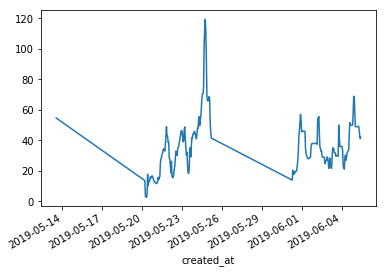

In [72]:
df['pm10'].plot()

In [73]:
df1 = df.loc['2019-05-21' : '2019-05-24 14']
df2 = df.loc['2019-05-31 1:00' :]

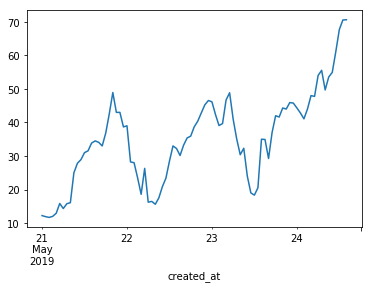

In [292]:
df1['pm10'].plot()

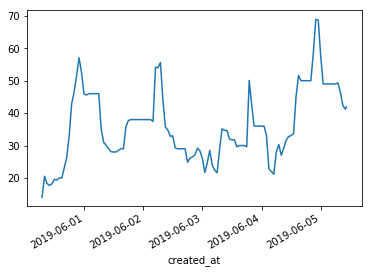

In [293]:
df2['pm10'].plot()

In [74]:
#6월 4-5일 값 예측
train2 = df2.iloc[:,5]
test2 = df2.iloc[:,5]
train2 = train2.loc[:'2019-06-03 23']
test2 = test2.loc['2019-06-04 00':'2019-06-04 23']

In [75]:
train2 = pd.DataFrame(train2)
test2 = pd.DataFrame(test2)

In [80]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [129]:
model = sm.tsa.SARIMAX(train2, order=(1,0,1), seasonal_order=(1,1, 0, 24))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               pm10   No. Observations:                   87
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 24)   Log Likelihood                -195.530
Date:                            Thu, 06 Jun 2019   AIC                            399.059
Time:                                    02:00:03   BIC                            407.632
Sample:                                         0   HQIC                           402.431
                                             - 87                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8462      0.077     11.000      0.000       0.695       0.997
ma.L1          0.2908      0.134   

In [130]:
pred = model_fit.predict(start=1100, end = 1114, dynamic = True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


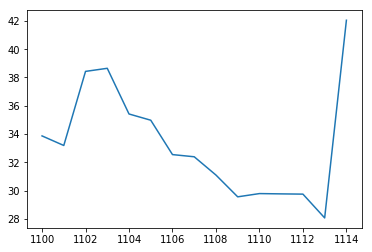

In [131]:
pred.plot()

In [132]:
fore = model_fit.forecast(steps=24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


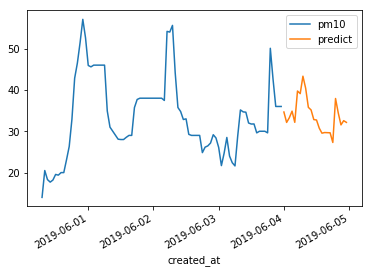

In [133]:
train2 = pd.DataFrame(train2)
fore = pd.DataFrame(fore)
test2 = pd.DataFrame(test2)
fore.columns = ["predict"]
fore = fore.set_index(test2.index)
pd.concat([train2, fore], axis=1).plot()

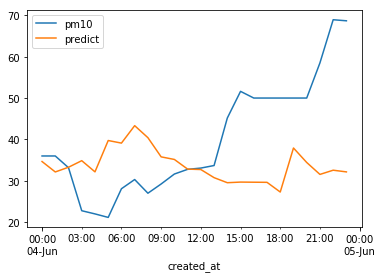

In [134]:
pd.concat([test2, fore], axis=1).plot()

1층

In [144]:
df = pd.read_csv('1floor.csv', encoding='cp949')
#전처리과정
df = df.rename(columns={'field1':'temperature'})
df = df.rename(columns={'field2':'humidity'})
df = df.rename(columns={'field3':'co2'})
df = df.rename(columns={'field4':'pm1'})
df = df.rename(columns={'field5':'pm2.5'})
df = df.rename(columns={'field6':'pm10'})
df = df.drop('entry_id', axis=1)
df = df.iloc[:, :7]
df = df.replace("-", np.nan)
df = df.dropna(axis=0)
df.iloc[:,1:] = df.iloc[:,1:].astype(str).astype(float)
for i in range(1, len(df)):
    if (df.iloc[i,4]>df.iloc[i-1,4]+20) or (df.iloc[i, 4] > 200):
        df.iloc[i, 4]=df.iloc[i-1, 4]
    if (df.iloc[i,5]>df.iloc[i-1,5]+20) or (df.iloc[i, 5] > 200):
        df.iloc[i, 5]=df.iloc[i-1, 5]
    if (df.iloc[i,6]>df.iloc[i-1,6]+20) or (df.iloc[i, 6] > 200):
        df.iloc[i, 6]=df.iloc[i-1, 6]
    df.iloc[i-1,0] = df.iloc[i-1,0][:13]

In [146]:
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.set_index('created_at', inplace=False)
df = df.groupby("created_at").mean()

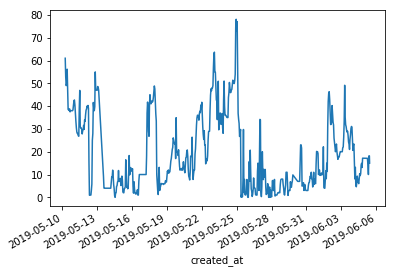

In [148]:
df['pm10'].plot()

In [162]:
#예측할 데이터들 따로 빼기 - pm10 사용 // 6월 4-5일 값 예측
train = df.iloc[:, 5]
test = df.iloc[:, 5]
train = train.loc[:'2019-06-03 23']
test = test.loc['2019-06-04 00':'2019-06-05 00']

In [283]:
model = sm.tsa.SARIMAX(train, order=(1,0,1), seasonal_order=(1,1, 0, 24)) 
#0,1,0으로 하면 최댓값 극대화됨
#1,2,1로 하면 최댓값 더 올라가고 왼ㅉ고으로 살짝 치우침
#나머지는 큰 변화가 없음
#1,1,1이 가장 덜 요동침
#order(1,2,1), seasonal(1,2,1) 하면 최댓값 내려감
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               pm10   No. Observations:                  576
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 24)   Log Likelihood               -1846.828
Date:                            Thu, 06 Jun 2019   AIC                           3701.656
Time:                                    02:41:55   BIC                           3718.910
Sample:                                         0   HQIC                          3708.397
                                            - 576                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9128      0.017     53.363      0.000       0.879       0.946
ma.L1          0.0628      0.040   

In [284]:
fore = model_fit.forecast(steps=21)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


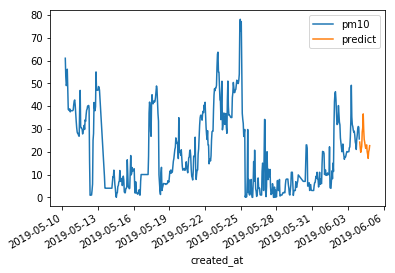

In [285]:
train = pd.DataFrame(train)
fore = pd.DataFrame(fore)
test = pd.DataFrame(test)
fore.columns = ["predict"]
fore = fore.set_index(test.index)
pd.concat([train, fore], axis=1).plot()

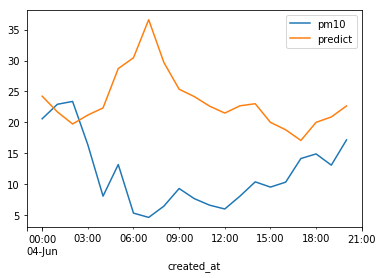

In [286]:
pd.concat([test, fore], axis=1).plot()